## Observations and Insights 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
#from scipy.stats import sem
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "right")
# Display the data table for preview
combined_data
#mouse_metadata
#study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice.
nmice = len(combined_data["Mouse ID"].unique())
nmice

249

In [45]:
combined_data[combined_data.duplicated(['Mouse ID','Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 



In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data = combined_data.drop_duplicates(['Mouse ID','Timepoint'],keep=False)
clean_data = combined_data[combined_data['Mouse ID']!= "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Checking the number of mice in the clean DataFrame.
num_cleaned_mice = len(clean_data['Mouse ID'].unique())
num_cleaned_mice

248

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_analysis = clean_data.groupby(['Drug Regimen'])
tumor_mean = regimen_analysis['Tumor Volume (mm3)'].mean()
tumor_median = regimen_analysis['Tumor Volume (mm3)'].median()
tumor_variance = regimen_analysis['Tumor Volume (mm3)'].var()
tumor_stdev = regimen_analysis['Tumor Volume (mm3)'].std()
tumor_mean_error = regimen_analysis['Tumor Volume (mm3)'].sem()

tumor_summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                 "Median Tumor Volume":tumor_median,
                                 "Tumor Volume Variance":tumor_variance,
                                 "Tumor Volume Std Dev":tumor_stdev,
                                 "Tumor Volume Std Err":tumor_mean_error})
tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

 

agsum_df = clean_data.groupby(['Drug Regimen']).agg(
                    Mean =pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
                    Median =pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc = "median"),
                    Variance =pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc = "var"),
                    Std = pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc = "std"),
                    SEM = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "sem"))
                    
agsum_df

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [51]:
regs = clean_data['Drug Regimen'].unique()
tp_by_reg = regimen_analysis['Timepoint'].count()
tp_by_reg
regs


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

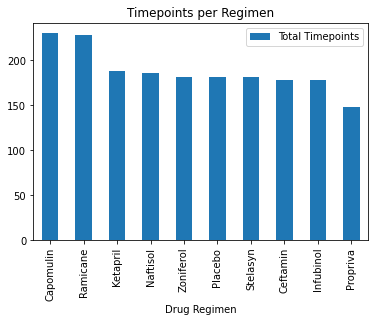

In [52]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tp_by_drug = regimen_analysis['Timepoint'].count()
tp_by_drug_df = pd.DataFrame({"Total Timepoints":tp_by_drug})
#tp_by_drug_df.reset_index
tp_by_drug_df = tp_by_drug_df.sort_values(['Total Timepoints'], ascending=False)
tp_by_drug_df.plot(kind='bar', title = 'Timepoints per Regimen')

<BarContainer object of 10 artists>

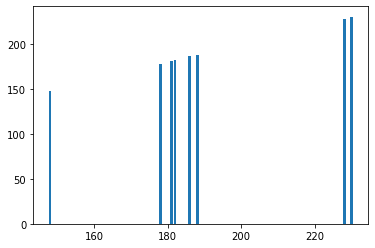

In [53]:
plt.bar(tp_by_drug,tp_by_drug)

In [54]:
drg =[""]
for r in regimen_analysis.groups:
    drg.append(r)
drg

['',
 'Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

newdf = pd.DataFrame({"Total Timepoints":tp_by_drug})
newdf.reset_index
newdf.sort_values(['Total Timepoints'],ascending=False)



newdf.head()

#plt.bar(x_axis, bars_in_cities, color="b", align="center")

,Total Timepoints
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = clean_data.groupby(['Sex']).count()
mice_gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")


NameError: name 'pie_votes' is not defined

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap = clean_data.loc[clean_data['Drug Regimen']=="Capomulin"]
cap = cap.drop_duplicates(subset = ['Mouse ID'], keep="last")

ram = clean_data.loc[clean_data['Drug Regimen']=="Ramicane"]
ram = ram.drop_duplicates(subset = ['Mouse ID'], keep="last")

inf = clean_data.loc[clean_data['Drug Regimen']=="Infubinol"]
inf = inf.drop_duplicates(subset = ['Mouse ID'], keep="last")

cef = clean_data.loc[clean_data['Drug Regimen']=="Ceftamin"]
cef = cef.drop_duplicates(subset = ['Mouse ID'], keep="last")


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tvol = [""]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capQ1 = cap.quantile(0.25)
capQ3 = cap.quantile(0.75)
capIQR = capQ3 - capQ1
low_out = capQ1 - 1.5*capIQR
high_out = capQ3 + 1.5*capIQR
low_out
#cap_outliers = cap.loc[(cap['Tumor Volume (mm3)']) > high_out]


ramQ1 = ram.quantile(0.25)
ramQ3 = ram.quantile(0.75)
ramIQR = ramQ3 - capQ1
low_out = ramQ1 - 1.5*ramIQR
high_out = ramQ3 + 1.5*ramIQR

infQ1 = inf.quantile(0.25)
infQ3 = inf.quantile(0.75)
infIQR = infQ3 - capQ1
low_out = infQ1 - 1.5*infIQR
high_out = infQ3 + 1.5*infIQR

cefQ1 = cef.quantile(0.25)
cefQ3 = cef.quantile(0.75)
cefIQR = cefQ3 - capQ1
low_out = cefQ1 - 1.5*cefIQR
high_out = cefQ3 + 1.5*cefIQR


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    

    # Determine outliers using upper and lower bounds
cap   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2


In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

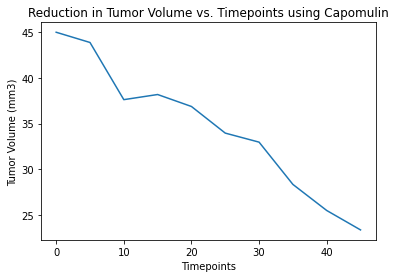

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = clean_data.loc[clean_data['Drug Regimen']=="Capomulin"]
#capo_mouse[capo_mouse.duplicated(['Timepoint'])]
capo_mouse = capo_mouse.drop_duplicates(subset = ['Timepoint'], keep="first")
#capo_mouse.head
plt.plot(capo_mouse['Timepoint'],capo_mouse['Tumor Volume (mm3)'])
plt.title("Reduction in Tumor Volume vs. Timepoints using Capomulin")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.show

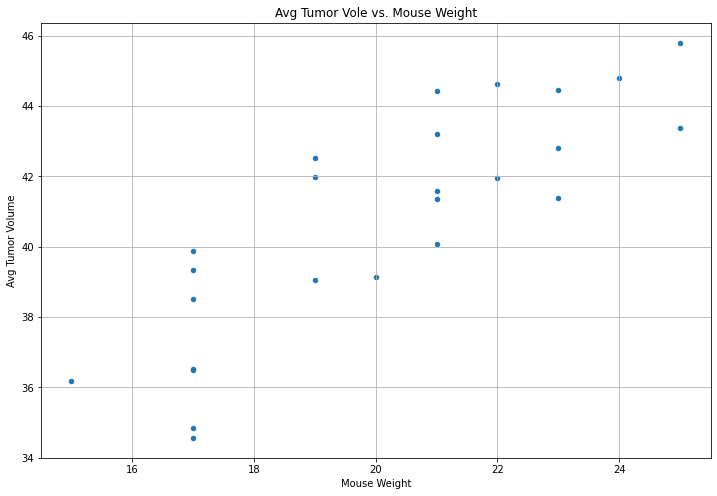

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo = clean_data.loc[clean_data['Drug Regimen']=="Capomulin"]
capow = capo.groupby(['Mouse ID'])
capowvol = capow['Tumor Volume (mm3)'].mean()
capowwei = capow['Weight (g)'].first()

capomulin_analysis = pd.DataFrame({'Mouse Weight':capowwei,'Avg Tumor Volume':capowvol})
capomulin_analysis

capomulin_analysis.plot(kind="scatter", x="Mouse Weight", y="Avg Tumor Volume", grid=True, figsize=(12,8),
              title="Avg Tumor Vole vs. Mouse Weight")
plt.show()


                           


## Correlation and Regression

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


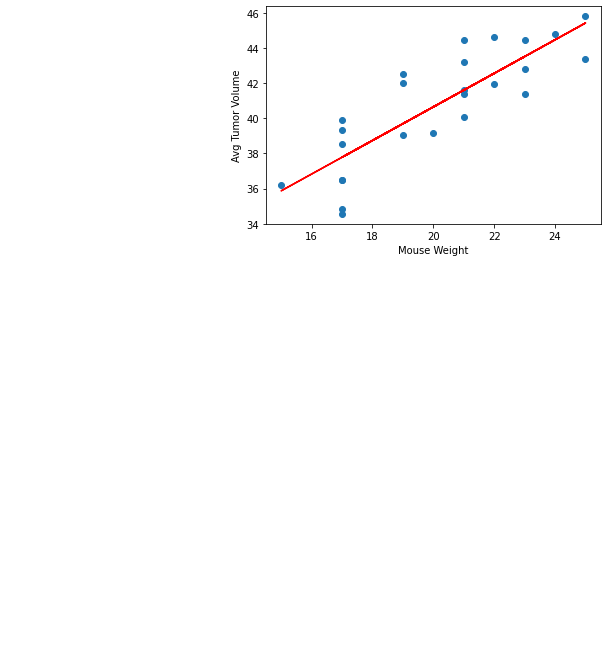

The correlation coefficient for Avg Tumor Volume vs. Mouse Weight is : 0.8419363424694718


In [70]:
x_values = capomulin_analysis['Mouse Weight']
y_values = capomulin_analysis['Avg Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume')
plt.show()
print(f'The correlation coefficient for Avg Tumor Volume vs. Mouse Weight is : {rvalue}')